In [78]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

In [79]:
df = pd.read_csv('Advertising.csv')
df.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [81]:
df.describe().style.format(precision=2).background_gradient(cmap='RdBu')

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,147.04,23.26,30.55,14.02
std,57.88,85.85,14.85,21.78,5.22
min,1.00,0.70,0.00,0.30,1.60
25%,50.75,74.38,9.97,12.75,10.38
50%,100.50,149.75,22.90,25.75,12.90
75%,150.25,218.82,36.52,45.10,17.40
max,200.00,296.40,49.60,114.00,27.00


In [82]:
# Data types of columns
print(" Data types of columns:")
print(df.dtypes)

 Data types of columns:
Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object


In [83]:
# drop duplicate values
df = df.drop_duplicates()
df.duplicated().sum()

0

In [84]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [85]:
df.shape

(200, 5)

<Figure size 1000x600 with 0 Axes>

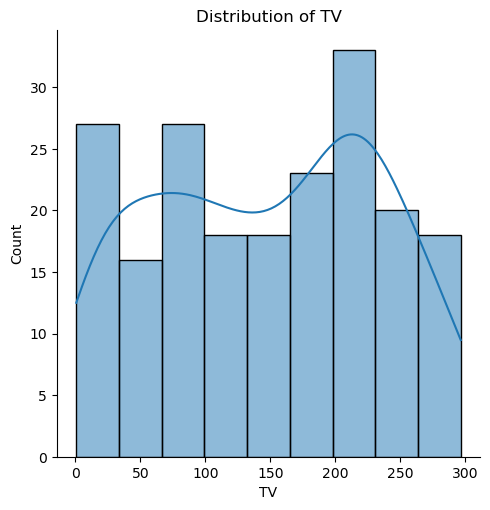

<Figure size 1000x600 with 0 Axes>

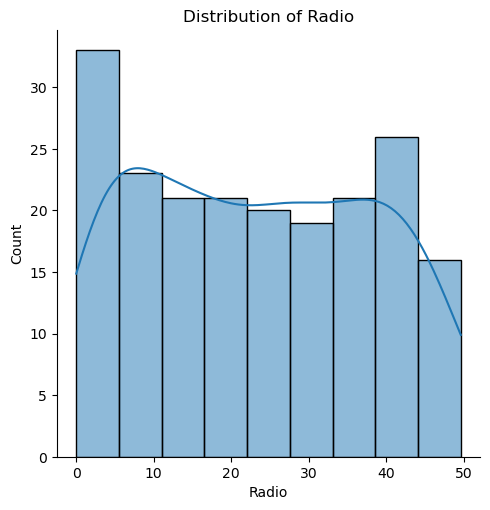

<Figure size 1000x600 with 0 Axes>

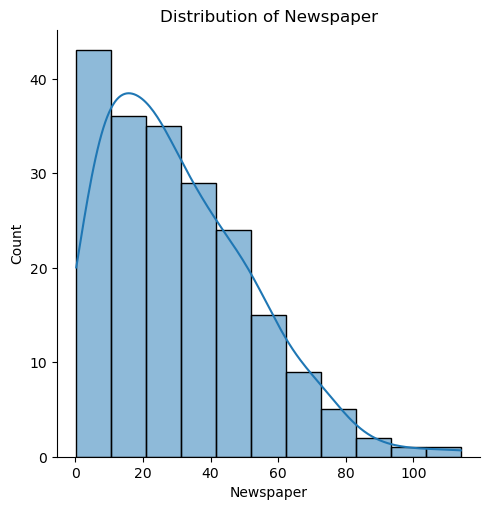

<Figure size 1000x600 with 0 Axes>

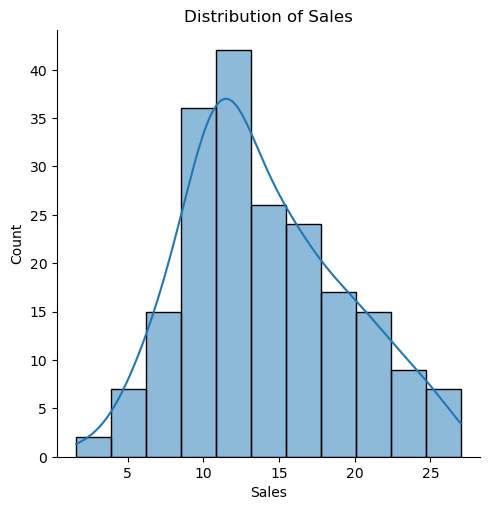

In [86]:
numerical_features = ['TV', 'Radio', 'Newspaper','Sales']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.displot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

<AxesSubplot:ylabel='Frequency'>

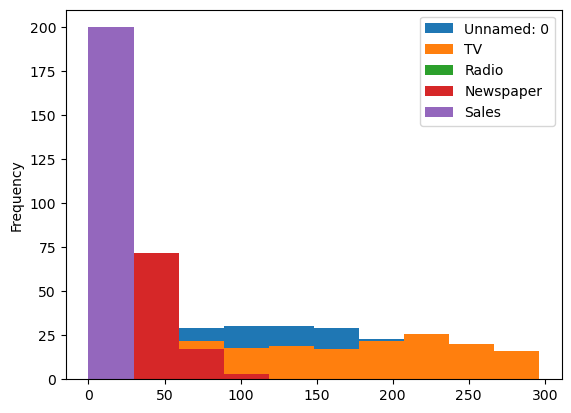

In [87]:
df.plot(kind = 'hist')

<AxesSubplot:>

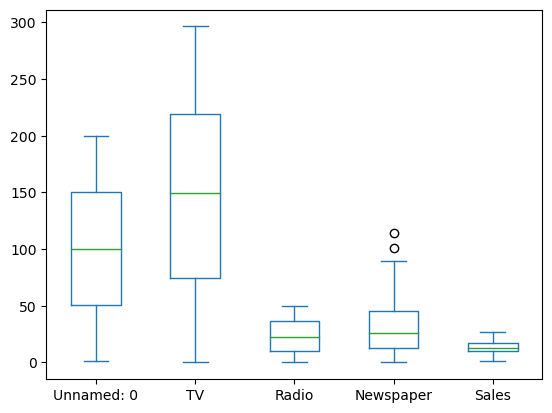

In [88]:
df.plot.box()

<AxesSubplot:xlabel='TV', ylabel='Sales'>

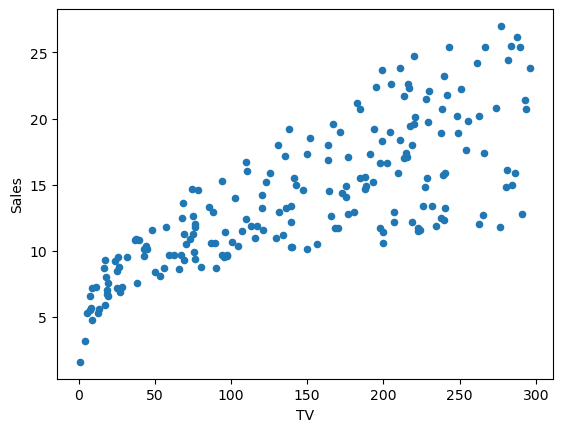

In [89]:
df.plot(kind = 'scatter',
       x='TV' , y='Sales')

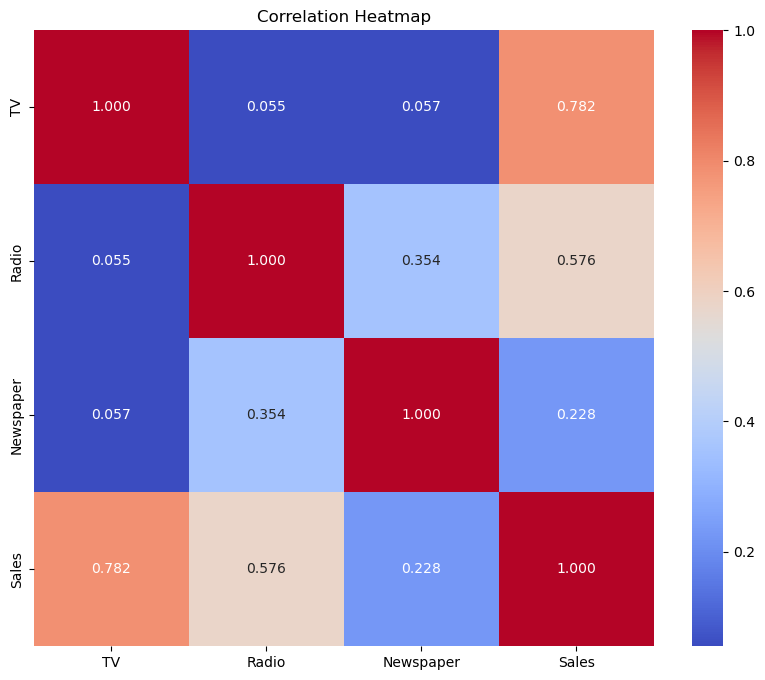

In [90]:
# Select numerical columns
numerical_columns =['TV', 'Radio', 'Newspaper','Sales']

# Create a DataFrame containing only the numerical columns
numerical_df = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()

In [91]:
X = df.drop('Sales' , axis=1)
Y = df['Sales']

X

,Unnamed: 0,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [93]:
#Linear Regression Model

model = LinearRegression()
model.fit(X_train , Y_train)

LinearRegression()

In [94]:
# Evaluate the model
y_pred = model.predict(X_test)

In [95]:
# Evaluate the model
Linear_mae = mean_absolute_error(Y_test, y_pred)
Linear_mse = mean_squared_error(Y_test, y_pred)
Linear_rmse = mse ** 0.5

print(f'MAE: {Linear_mae}')
print(f'RMSE: {Linear_rmse}')

MAE: 1.4650601050102932
RMSE: 1.327685956843711


In [96]:
# Testing model prediction
new = [[196 , 38.2 , 3.7 ,13.8]]
predicted_price = model.predict(new)
print('Predicted Sales:', predicted_price[0])

Predicted Sales: 5.483172717138288


C:\Users\20128\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [97]:
#Decision Tree Model

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train , Y_train)

DecisionTreeRegressor(random_state=42)

In [98]:
# Evaluate the model
y_pred_decision = decision_tree.predict(X_test)

In [99]:
# Evaluate the model
mse_decision = mean_squared_error(Y_test, y_pred_decision)
mae_decision = mean_absolute_error(Y_test, y_pred_decision)
rmse_decision = mse ** 0.5

print(f'RMSE: {rmse_decision}')
print(f'Mean Absolute Error: {mae_decision}')

RMSE: 1.327685956843711
Mean Absolute Error: 1.0125000000000002


In [100]:
# Testing model prediction
new_sales = [[196 , 38.2 , 3.7 ,13.8]]
predicted_price = decision_tree.predict(new_sales)
print('Predicted Sales:', predicted_price[0])

Predicted Sales: 7.6


C:\Users\20128\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [101]:
#Support Virtual Machine

svm = SVR(kernel ='rbf')
svm.fit(X_train , Y_train)

SVR()

In [102]:
#Evaluate theModel
y_pred_svm = svm.predict(X_test)

In [103]:
# Evaluate the model
mse_svm = mean_squared_error(Y_test, y_pred)
mae_svm = mean_absolute_error(Y_test, y_pred)
rmse_svm = mse_svm ** 0.5

print(f'RMSE: {rmse_svm}')
print(f'Mean Absolute Error: {mae}')

RMSE: 1.7885761008659662
Mean Absolute Error: 1.0125000000000002


In [107]:
# Testing model prediction
new_svm = [[196 , 38.2 , 3.7 ,13.8]]
predicted_price = svm.predict(new_svm)
print('Predicted Sales:', predicted_price[0])

Predicted Sales: 8.598956499766874


C:\Users\20128\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


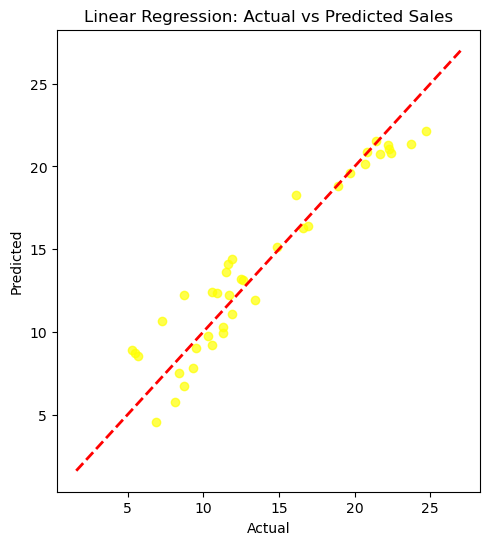

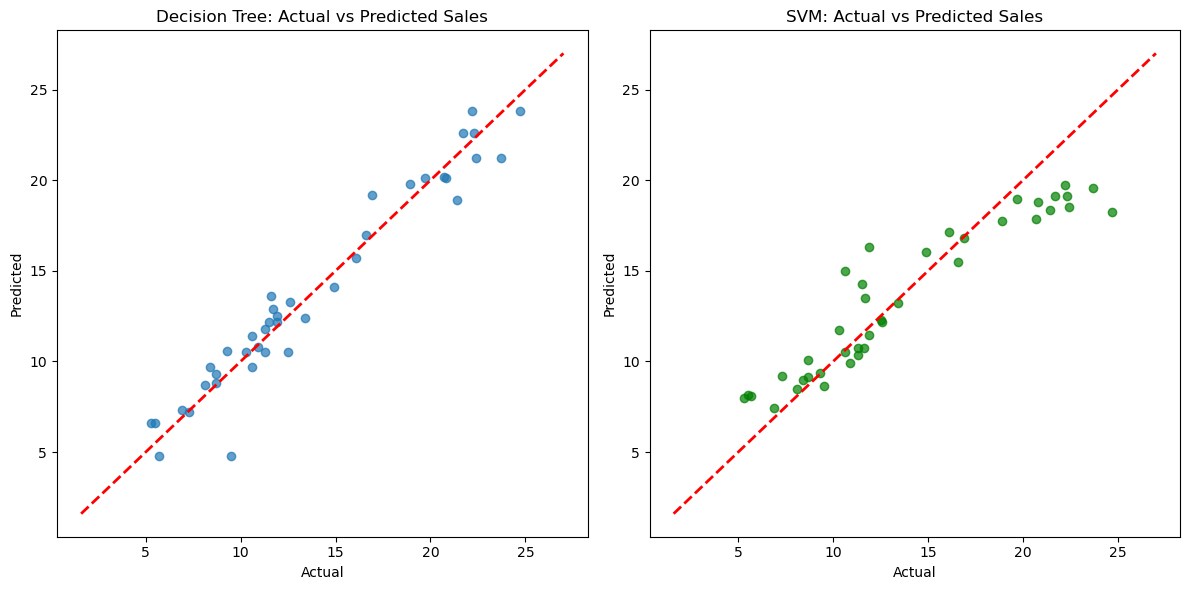

Linear Regression Mean Squared Error: 1.327685956843711
Linear Regression Mean Absolute Error: 1.4650601050102932
-----------------------------------
Decision Tree Mean Squared Error: 1.327685956843711
Decision Tree Mean Absolute Error: 1.0125000000000002
-----------------------------------
SVM Mean Squared Error: 1.7885761008659662
SVM Mean Absolute Error: 1.4650601050102932


In [105]:
# Plotting actual vs predicted values for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_test, y_pred, alpha=0.7 , color='yellow')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted Sales')

# Plotting actual vs predicted values for Decision Tree
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_test, y_pred_decision, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree: Actual vs Predicted Sales')

# Plotting actual vs predicted values for SVM
plt.subplot(1, 2, 2)
plt.scatter(Y_test, y_pred_svm, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM: Actual vs Predicted Sales')

plt.tight_layout()
plt.show()

# Compare model performance
# Compare model performance
print(f'Linear Regression Mean Squared Error: {Linear_rmse}')
print(f'Linear Regression Mean Absolute Error: {Linear_mae}')
print('-----------------------------------')
print(f'Decision Tree Mean Squared Error: {rmse_decision}')
print(f'Decision Tree Mean Absolute Error: {mae_decision}')
print('-----------------------------------')
print(f'SVM Mean Squared Error: {rmse_svm}')
print(f'SVM Mean Absolute Error: {mae_svm}')
